In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
%matplotlib widget

pd.options.mode.chained_assignment = None  # Disable the warning

pressure=5
diffusion="5.0percent"
# diffusion="nodiff"
file_id = "1"

# hits = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_{diffusion}_filtered.h5", "MC/hits")
# hits_true = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_{pressure}bar_nexus_filtered.h5", "MC/hits")


hits_true = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_{pressure}bar_Efilt_smear_{file_id}.h5", "MC/hits")

if (diffusion == "nodiff"):
    hits      = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_{pressure}bar_Efilt_smear_{file_id}.h5", "MC/hits")
else:
    hits      = pd.read_hdf(f"../data/ATPC_0nubb/ATPC_0nubb_{pressure}bar_Efilt_{diffusion}_smear_{file_id}.h5", "MC/hits")


# hits_true = pd.read_hdf(f"../data/ATPC_Tl/ATPC_Tl_1bar_nexus_2954.h5", "MC/hits")
# hits = pd.read_hdf("../data/ATPC_Tl/ATPC_Tl_1bar_smear_2954.h5", "MC/hits")

display(hits)

event_list = hits.event_id.unique()

eid=event_list[34]
print(eid)
# eid = 321979

data = hits[hits.event_id ==eid]
# data = CutandRedistibuteEnergy(data, 0.0004)

data_true = hits_true[hits_true.event_id == eid]
# data_true["z"] = data_true["z"]-det_size/2.0

# print(hits.event_id.unique())

,event_id,x,y,z,energy
0,176,-289.726746,1294.273193,1173.0,0.000391
1,176,-289.726746,1297.273193,1173.0,0.000443
2,176,-286.726746,1294.273193,1173.0,0.000782
3,176,-286.726746,1297.273193,1173.0,0.000912
4,176,-301.726746,1297.273193,1176.0,0.000547
...,...,...,...,...,...
86142,244,-451.726746,-100.726761,1053.0,0.000361
86143,244,-457.726746,-109.726761,1056.0,0.000593
86144,244,-454.726746,-109.726761,1056.0,0.000645
86145,244,-454.726746,-106.726761,1056.0,0.000799


211


In [163]:

Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist, voxel_size, det_half_length = InitializeParams(pressure, diffusion)

print("Diffussion smear is: ",        Diff_smear,            "mm/sqrt(cm)")
print("Energy threshold is: ",        1000*energy_threshold, "keV")
print("diffision scale factor is: ",  diff_scale_factor)
print("Radius scale factor is: ",     radius_sf)
print("Hit grouping factor is: ",     group_sf)
print("Tortuosity distance scale is:", Tortuosity_dist)
print("The voxel size is: ",           voxel_size)

group_sf = 0.05

mean_sigma = group_sf*Diff_smear*np.sqrt(0.1*data.z.mean())

# The expected diffusion is less than vox size so replace
if (mean_sigma < voxel_size/2):
    mean_sigma = voxel_size/2


print("mean_sigma:", mean_sigma)

Diffussion smear is:  0.14042506898698678 mm/sqrt(cm)
Energy threshold is:  0.3 keV
diffision scale factor is:  6
Radius scale factor is:  7
Hit grouping factor is:  30
Tortuosity distance scale is: 70.0
The voxel size is:  3
mean_sigma: 1.5


In [164]:
reco_DE_event = data.copy()

print(len(reco_DE_event))

reco_DE_event = CutandRedistibuteEnergy(reco_DE_event, energy_threshold)

df_merged = GroupHits(reco_DE_event, mean_sigma)

1337
Running grouping again new mean sigma is: 15.0


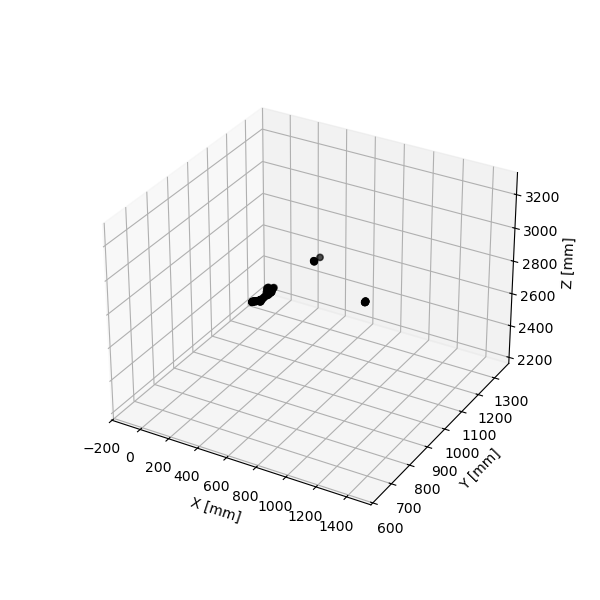

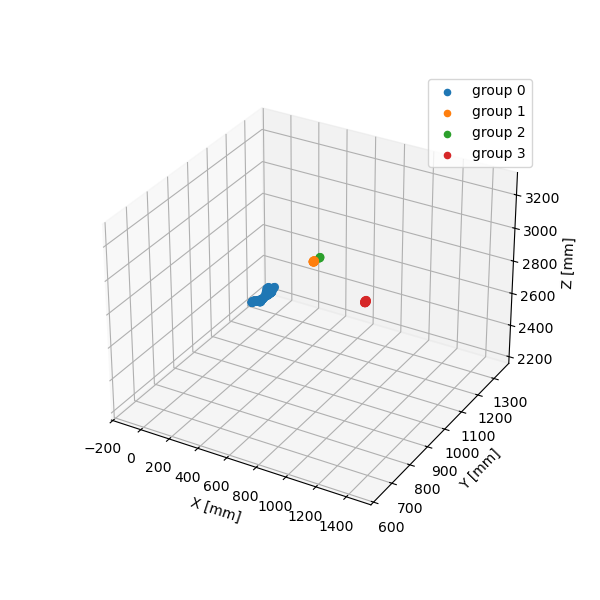

In [165]:

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(data_true['x'], data_true['y'], data_true['z'],c="k")
# ax1.scatter(data['x'], data['y'], data['z'],c="k", s=0.1)

ax1.set_xlabel("X [mm]")
ax1.set_ylabel("Y [mm]")
ax1.set_zlabel("Z [mm]")


fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')
for gid in sorted(df_merged["group_id"].unique()):
    temp_df = df_merged[df_merged.group_id == gid]
    ax1.scatter(temp_df['x'], temp_df['y'], temp_df['z'],label = f"group {gid}")
    # ax1.scatter(data['x'], data['y'], data['z'],c="k", s=0.1)

    ax1.set_xlabel("X [mm]")
    ax1.set_ylabel("Y [mm]")
    ax1.set_zlabel("Z [mm]")
    ax1.legend()
# plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/GroupedHits.pdf")

In [166]:
# for eid in hits.event_id.unique():
#     data = hits[hits.event_id ==eid]

#     Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist = InitializeParams(pressure, diffusion)

#     # group_sf = 30
#     # energy_threshold=0.0004

#     reco_DE_event = CutandRedistibuteEnergy(data, energy_threshold)

#     mean_sigma = group_sf*Diff_smear*np.sqrt(0.1*reco_DE_event.z.mean())
#     # print(group_sf, Diff_smear, mean_sigma)

#     df_merged = GroupHits(reco_DE_event, mean_sigma)

#     # # If we have too many groups then bump up the voxel size since the track was broken too much
#     # if (len(df_merged.group_id.unique()) > 7):
#     #     print("Running grouping again new mean sigma is:", mean_sigma*15)
#     #     df_merged = GroupHits(reco_DE_event, mean_sigma*15)

#     fig = plt.figure(figsize=(10, 8))
#     ax1 = fig.add_subplot(111, projection='3d')
#     for gid in sorted(df_merged["group_id"].unique()):
#         temp_df = df_merged[df_merged.group_id == gid]
#         ax1.scatter(temp_df['x'], temp_df['y'], temp_df['z'],label = f"group {gid}")
#         # ax1.scatter(data['x'], data['y'], data['z'],c="k", s=0.1)

#         ax1.set_xlabel("X [mm]")
#         ax1.set_ylabel("Y [mm]")
#         ax1.set_zlabel("Z [mm]")
#         ax1.legend()

#     plt.savefig(f"plots/grouping/{pressure}bar/{diffusion}/{eid}.pdf")
#     plt.close()